In [2]:
!pip install opencv-python-headless
!pip install pytesseract

# Test 1

In [3]:
import cv2
import pytesseract
import shutil
import os
import random

In [4]:
try:
 from PIL import Image
except ImportError:
 import Image

In [5]:
image_path_in_colab='/content/image.jpeg'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

TesseractNotFoundError: ignored

# Test 2

In [ ]:
import cv2
import pytesseract

In [ ]:
# Load the image
image = cv2.imread('/content/fake.jpg')

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# You can adjust the threshold values based on your image
_, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [ ]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Initialize Tesseract OCR
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Replace with your Tesseract path

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Extract the ROI (Region of Interest) containing the text
    roi = image[y:y + h, x:x + w]

    # Perform OCR on the ROI
    text = pytesseract.image_to_string(roi, config='--psm 6')  # You can adjust the configuration options as needed

    # Print the recognized text and draw bounding boxes
    print("Text:", text)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)


Text: mals
iFake Text Message
Create a Fake Text Message Conversation



# Test 3

In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

In [ ]:
import urllib.request

# Replace 'image_url' with the URL of your image
#image_url = 'https://upload.wikimedia.org/wikipedia/commons/a/a7/Malkassignboard.JPG'
#urllib.request.urlretrieve(image_url, 'image.jpg')

# Load the image using OpenCV
image = cv2.imread('/content/test_1.jpg')

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to make the text more visible
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [ ]:
# Perform OCR on the thresholded image
text = pytesseract.image_to_string(thresholded)

In [ ]:
# Find the coordinates of the detected text region using contours
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)


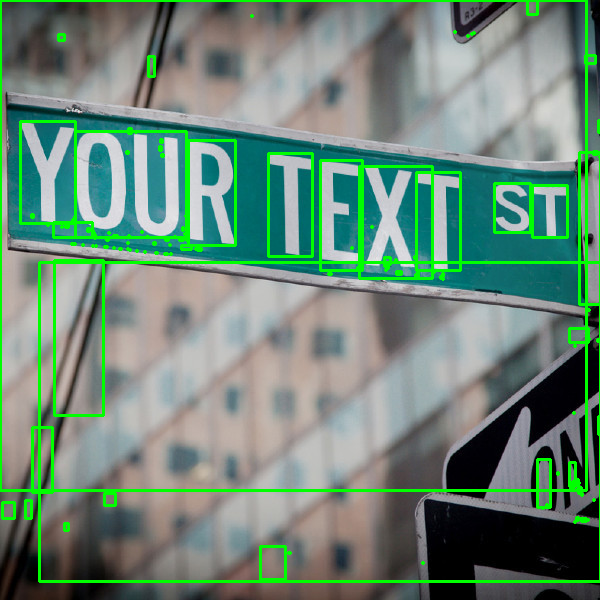

In [ ]:
# Display the image with the bounding box
cv2_imshow(image)
